### Transformaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Lectura del csv, tomo columnas que me interesan 

oscars = pd.read_csv('./Datasets/Oscars-demographics.csv', encoding='latin-1', usecols=['birthplace', 'date_of_birth',\
                                                                             'race_ethnicity', 'religion',\
                                                                             'sexual_orientation', 'year_of_award',\
                                                                             'award', 'movie', 'person'])

#Correcion de columnas con informacion incorrecta

oscars.loc[:, 'date_of_birth'] = pd.to_datetime(oscars['date_of_birth'], errors='coerce')
oscars['year_of_birth'] = oscars.loc[:, 'date_of_birth'].dt.year
oscars['age_at_award'] = oscars['year_of_award'] - (oscars['date_of_birth'].dt.year)
oscars.loc[oscars['age_at_award'] < 1, 'year_of_birth'] = oscars.loc[oscars['age_at_award'] < 1, 'year_of_birth'] - 100
oscars['age_at_award'] = oscars['year_of_award'] - oscars['year_of_birth']
oscars.tail(5)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
436,"London, England",1971-03-07,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,1971.0,35.0
437,"Manchester, England",2056-10-20,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle,1956.0,53.0
438,"Chicago, Il",2022-07-26,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards,1922.0,55.0
439,"Laurel, Ne",2028-08-31,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn,1928.0,71.0
440,"Nevada, Mo",2006-08-05,White,Na,Straight,1949,Best Director,The Treasure of the Sierra Madre,John Huston,1906.0,43.0


In [2]:
oscars_best_actress = oscars.loc[oscars['award'].str.contains('Best Actress'),:]
oscars_best_actor = oscars.loc[oscars['award'].str.contains('Best Actor'),:]

In [3]:
oscars_best_actress.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
251,"Philadelphia, Pa",2006-10-06,White,Na,Straight,1929,Best Actress,7th Heaven,Janet Gaynor,1906.0,23.0
252,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,1892.0,38.0
253,"Montreal, Quebec, Canada",1902-08-10,White,Na,Straight,1930,Best Actress,The Divorcee,Norma Shearer,1902.0,28.0
254,"Cobourg, Ontario, Canada",1868-11-02,White,Na,Straight,1931,Best Actress,Min and Bill,Marie Dressler,1868.0,63.0
255,"Washington, Dc",1900-10-10,White,Na,Straight,1932,Best Actress,The Sin of Madelon Claudet,Helen Hayes,1900.0,32.0


In [4]:
oscars_best_actor.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,1889.0,41.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,1878.0,53.0
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,1885.0,47.0


* Append

In [5]:
#Combina best actor con best actress
oscars_best_actor_actress = oscars_best_actor.append(oscars_best_actress)
oscars_best_actor_actress

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,1889.0,41.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,1878.0,53.0
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,1885.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...
428,"London, England",2032-02-27,White,Jewish,Straight,1967,Best Actress,Who's Afraid of Virginia Woolf?,Elizabeth Taylor,1932.0,35.0
429,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0
430,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0
431,"Los Angeles, Ca",1972-09-27,White,Jewish,Straight,1999,Best Actress,Shakespeare in Love,Gwyneth Paltrow,1972.0,27.0


In [6]:
len(oscars_best_actor)

88

In [7]:
len(oscars_best_actress)

95

In [8]:
#Se suma la cantidad de filas, 88 + 95 = 183
len(oscars_best_actor_actress)

183

* Concat

In [9]:
oscars_best_actor_actress_concat = pd.concat([oscars_best_actor, oscars_best_actress])
oscars_best_actor_actress_concat

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,1889.0,41.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,1878.0,53.0
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,1885.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...
428,"London, England",2032-02-27,White,Jewish,Straight,1967,Best Actress,Who's Afraid of Virginia Woolf?,Elizabeth Taylor,1932.0,35.0
429,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0
430,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0
431,"Los Angeles, Ca",1972-09-27,White,Jewish,Straight,1999,Best Actress,Shakespeare in Love,Gwyneth Paltrow,1972.0,27.0


* Merge/Join


Tipos:
- "inner": Intersección de x e y.

- "outer": Unión de x e y.

- "left": Claves que estan en x junto con las claves de y, algunas claves de y pueden no tener dato.

- "right": Análogo a left pero con y. 

In [10]:
grouped = oscars.groupby(['year_of_award']).agg({'age_at_award':['mean', 'count']})
grouped.tail()

age_at_award      
                      mean count
year_of_award                   
2010                  49.4     5
2011                  41.6     5
2012                  54.2     5
2013                  45.2     5
2014                  41.0     4

In [11]:
#Como hay dos niveles de claves las concatenamos
level_0 = grouped.columns.get_level_values(0)
level_1 = grouped.columns.get_level_values(1)
#Suma columna a columna los nombres de los niveles
grouped.columns = level_0 + '_' + level_1
#Cambiamos el índice al default, previamente estaba year_of_award
grouped.reset_index(inplace=True)
grouped.tail()

,year_of_award,age_at_award_mean,age_at_award_count
82,2010,49.4,5
83,2011,41.6,5
84,2012,54.2,5
85,2013,45.2,5
86,2014,41.0,4


In [12]:
#left_on es la columna 'year_of_award' de oscars
#right_on es la columna 'year_of_award' de grouped
oscars_per_year = oscars.merge(grouped, left_on='year_of_award', right_on='year_of_award', how='outer')
oscars_per_year.tail()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award,age_at_award_mean,age_at_award_count
436,"Woodlawn, Md",2067-12-11,Black,Na,Straight,2010,Best Supporting Actress,Precious,Mo'Nique,1967.0,43.0,49.4,5
437,"Uvalde, Tx",2069-11-04,White,Na,Straight,2014,Best Actor,Dallas Buyers Club,Matthew McConaughey,1969.0,45.0,41.0,4
438,"Bossier City, La",1971-12-26,White,Na,Straight,2014,Best Supporting Actor,Dallas Buyers Club,Jared Leto,1971.0,43.0,41.0,4
439,"Melbourne, Victoria, Australia",2069-05-14,White,Na,Straight,2014,Best Actress,Blue Jasmine,Cate Blanchett,1969.0,45.0,41.0,4
440,"Mexico City, Mexico",1983-03-01,Black,Na,Na,2014,Best Supporting Actress,12 Years a Slave,Lupita Nyong'o,1983.0,31.0,41.0,4


In [13]:
year_lt_40 = grouped.loc[grouped['age_at_award_mean'] < 40, :]
year_lt_40.tail()

,year_of_award,age_at_award_mean,age_at_award_count
68,1996,37.600000,5
72,2000,36.500000,6
73,2001,37.833333,6
76,2004,38.250000,4
78,2006,39.333333,6


In [14]:
#Por default merge aplica "inner"
oscars.merge(year_lt_40, left_on='year_of_award', right_on='year_of_award')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award,age_at_award_mean,age_at_award_count
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0,32.000000,1
1,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,1899.0,33.0,37.333333,3
2,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,1885.0,47.0,37.333333,3
3,"Washington, Dc",1900-10-10,White,Na,Straight,1932,Best Actress,The Sin of Madelon Claudet,Helen Hayes,1900.0,32.0,37.333333,3
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,1894.0,39.0,39.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,"New Orleans, La",1976-03-22,White,Na,Straight,2006,Best Actress,Walk the Line,Reese Witherspoon,1976.0,30.0,39.333333,6
109,"London, England",1971-03-07,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,1971.0,35.0,39.333333,6
110,"London, England",1971-03-07,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,1971.0,35.0,39.333333,6
111,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0,34.000000,2


#### Grouping ####

Trabajar con datos de distintas filas al mismo tiempo. Split, apply, combine.

In [15]:
grouped = oscars.groupby(['award']).agg({'age_at_award':['mean', 'count']})
grouped

age_at_award      
                                mean count
award                                     
Best Actor                 45.045455    88
Best Actress               36.421053    95
Best Director              47.300000    90
Best Supporting Actor      50.890244    82
Best Supporting Actress    40.505882    85

In [16]:
grouped = oscars.groupby(['year_of_award']).agg({'age_at_award':['mean', 'count']})
grouped.tail()

age_at_award      
                      mean count
year_of_award                   
2010                  49.4     5
2011                  41.6     5
2012                  54.2     5
2013                  45.2     5
2014                  41.0     4

In [17]:
#La columna age_at_award, count es una tupla y se accede de la siguiente forma
grouped.loc[grouped[('age_at_award', 'count')] > 5, :].sort_values(('age_at_award','mean'), ascending=False).head(10)

age_at_award      
                      mean count
year_of_award                   
1969             54.750000     8
2007             53.166667     6
1999             51.571429     7
1977             51.000000     6
1976             49.142857     7
1953             47.666667     6
1990             47.166667     6
1973             44.833333     6
2009             44.571429     7
1970             44.500000     6

Text(0.5, 0, 'Category')

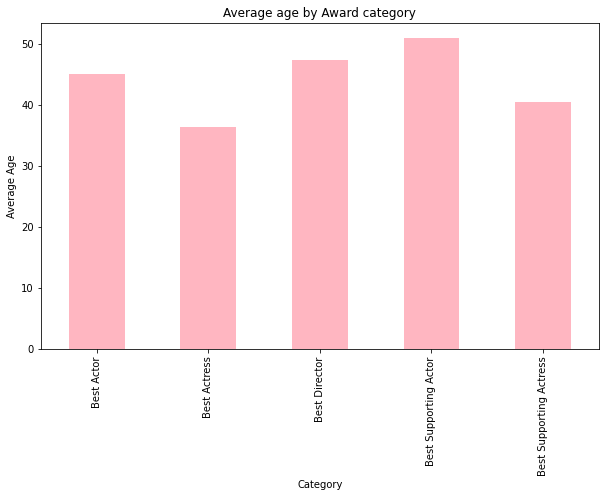

In [18]:
oscars.groupby('award').mean().loc[:, 'age_at_award'].plot(kind='bar', title='Average age by Award category', linewidth=2, figsize=(10, 6), color='lightpink')
ax = plt.gca()
ax.set_ylabel('Average Age')
ax.set_xlabel('Category')

Acceder a valores agrupados con `get_group()`

In [19]:
grouped = oscars.groupby(['movie'])
grouped.head()

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,1886.0,44.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,1895.0,36.0
3,"Chicago, Il",1899-02-23,White,Na,Straight,1932,Best Director,Skippy,Norman Taurog,1899.0,33.0
4,"Salt Lake City, Ut",1894-04-23,White,Roman Catholic,Straight,1933,Best Director,Bad Girl,Frank Borzage,1894.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...
436,"London, England",1971-03-07,White,Jewish,Straight,2006,Best Supporting Actress,The Constant Gardener,Rachel Weisz,1971.0,35.0
437,"Manchester, England",2056-10-20,White,Roman Catholic,Straight,2009,Best Director,Slumdog Millionaire,Danny Boyle,1956.0,53.0
438,"Chicago, Il",2022-07-26,White,Na,Straight,1977,Best Supporting Actor,All the President's Men,Jason Robards,1922.0,55.0
439,"Laurel, Ne",2028-08-31,White,Na,Straight,1999,Best Supporting Actor,Affliction,James Coburn,1928.0,71.0


In [20]:
grouped.get_group('Cabaret')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
46,"Chicago, Il",2027-06-23,White,Na,Straight,1973,Best Director,Cabaret,Bob Fosse,1927.0,46.0
209,"Cleveland, Oh",2032-04-11,White,Jewish,Gay,1973,Best Supporting Actor,Cabaret,Joel Grey,1932.0,41.0
296,"Los Angeles, Ca",2046-03-12,White,Na,Na,1973,Best Actress,Cabaret,Liza Minnelli,1946.0,27.0


Si agrupamos por múltiples columnas

In [21]:
grouped = oscars.groupby(['person', 'award']).size()
grouped.head()

person         award                  
Adrien Brody   Best Actor                 1
Al Pacino      Best Actor                 1
Alan Arkin     Best Supporting Actor      1
Alec Guinness  Best Actor                 1
Alice Brady    Best Supporting Actress    1
dtype: int64

In [22]:
grouped = oscars.groupby(['person', 'award']).size().sort_values(ascending=False)
grouped

person               award                  
Katharine Hepburn    Best Actress               4
John Ford            Best Director              4
Hilary Swank         Best Actress               4
Tom Hanks            Best Actor                 3
Elizabeth Taylor     Best Actress               3
                                               ..
Lupita Nyong'o       Best Supporting Actress    1
Maggie Smith         Best Supporting Actress    1
Margaret Rutherford  Best Supporting Actress    1
Marie Dressler       Best Actress               1
Adrien Brody         Best Actor                 1
Length: 360, dtype: int64

In [23]:
grouped = oscars.groupby(['person', 'award']).size().nlargest(10)
grouped

person             award                
Hilary Swank       Best Actress             4
John Ford          Best Director            4
Katharine Hepburn  Best Actress             4
Billy Wilder       Best Director            3
Daniel Day-Lewis   Best Actor               3
Elizabeth Taylor   Best Actress             3
Frank Capra        Best Director            3
Gary Cooper        Best Actor               3
Jason Robards      Best Supporting Actor    3
Tom Hanks          Best Actor               3
dtype: int64

In [24]:
oscars['person'].value_counts().nlargest(10)

John Ford            4
Katharine Hepburn    4
Hilary Swank         4
Jack Nicholson       3
Maggie Smith         3
Frank Capra          3
William Wyler        3
Tom Hanks            3
Gary Cooper          3
Jason Robards        3
Name: person, dtype: int64

In [25]:
oscars['person'].value_counts().nsmallest(10)

Richard Attenborough    1
Jennifer Hudson         1
Javier Bardem           1
Kevin Kline             1
Estelle Parsons         1
Richard Dreyfuss        1
Dean Jagger             1
Mary Steenburgen        1
Kevin Costner           1
Warner Baxter           1
Name: person, dtype: int64

Armar un dataframe

In [26]:
oscars_by_religion = oscars.groupby(['award', 'religion']).size()
oscars_by_religion = oscars_by_religion.reset_index()
oscars_by_religion

,award,religion,0
0,Best Actor,Anglican/episcopalian,1
1,Best Actor,Atheist,2
2,Best Actor,Baptist,1
3,Best Actor,Born-Again Christian,3
4,Best Actor,Deist,3
5,Best Actor,Jewish,7
6,Best Actor,Lutheran,3
7,Best Actor,Na,44
8,Best Actor,Presbyterian,1
9,Best Actor,Protestant,3


In [27]:
col_rename = {0: 'count_religion'}
oscars_by_religion = oscars_by_religion.rename(columns=col_rename)
oscars_by_religion

,award,religion,count_religion
0,Best Actor,Anglican/episcopalian,1
1,Best Actor,Atheist,2
2,Best Actor,Baptist,1
3,Best Actor,Born-Again Christian,3
4,Best Actor,Deist,3
5,Best Actor,Jewish,7
6,Best Actor,Lutheran,3
7,Best Actor,Na,44
8,Best Actor,Presbyterian,1
9,Best Actor,Protestant,3


Aplicar varias operaciones con `agg()`

In [28]:
grouped = oscars.groupby(['year_of_award']).agg({'age_at_award':['mean', 'count']})
grouped.head()

age_at_award      
                      mean count
year_of_award                   
1927             32.000000     1
1929             34.000000     2
1930             42.600000     5
1931             50.666667     3
1932             37.333333     3

Aplicar multiples operaciones a columnas diferentes

In [29]:
grouped = oscars.groupby(['year_of_award']).agg({'age_at_award':['mean', 'count'], 'year_of_birth':'min', 'religion':['max', 'min']})
grouped.head()

age_at_award       year_of_birth        religion    
                      mean count           min             max min
year_of_award                                                     
1927             32.000000     1        1895.0              Na  Na
1929             34.000000     2        1884.0              Na  Na
1930             42.600000     5        1868.0              Na  Na
1931             50.666667     3        1868.0  Roman Catholic  Na
1932             37.333333     3        1885.0              Na  Na

In [30]:
level_0 = grouped.columns.get_level_values(0)
level_0

Index(['age_at_award', 'age_at_award', 'year_of_birth', 'religion',
       'religion'],
      dtype='object')

In [31]:
level_1 = grouped.columns.get_level_values(1)
level_1

Index(['mean', 'count', 'min', 'max', 'min'], dtype='object')

In [32]:
#Sumamos las columnas
grouped.columns = level_0 + '_' + level_1
grouped.tail()

,age_at_award_mean,age_at_award_count,year_of_birth_min,religion_max,religion_min
year_of_award,,,,,
2010,49.4,5,1949.0,Na,Lutheran
2011,41.6,5,1960.0,Na,Jewish
2012,54.2,5,1929.0,Na,Jewish
2013,45.2,5,1954.0,Na,Christian
2014,41.0,4,1969.0,Na,Na


In [33]:
grouped.reset_index(inplace=True)
grouped.tail()

,year_of_award,age_at_award_mean,age_at_award_count,year_of_birth_min,religion_max,religion_min
82,2010,49.4,5,1949.0,Na,Lutheran
83,2011,41.6,5,1960.0,Na,Jewish
84,2012,54.2,5,1929.0,Na,Jewish
85,2013,45.2,5,1954.0,Na,Christian
86,2014,41.0,4,1969.0,Na,Na


* Es posible definir funciones propias

In [34]:
def add_one(x):
    return x.mean() + 1

grouped = oscars.groupby('award').agg({'age_at_award': ['mean', add_one]})
grouped.tail()

age_at_award           
                                mean    add_one
award                                          
Best Actor                 45.045455  46.045455
Best Actress               36.421053  37.421053
Best Director              47.300000  48.300000
Best Supporting Actor      50.890244  51.890244
Best Supporting Actress    40.505882  41.505882

Podemos definir el nombre que lleva la columna de nuestra función

In [35]:
add_one.__name__ = 'PlusOne'
grouped = oscars.groupby('award').agg({'age_at_award': ['mean', add_one]})
grouped.tail()

age_at_award           
                                mean    PlusOne
award                                          
Best Actor                 45.045455  46.045455
Best Actress               36.421053  37.421053
Best Director              47.300000  48.300000
Best Supporting Actor      50.890244  51.890244
Best Supporting Actress    40.505882  41.505882

Información sobre el output de `groupby()`

In [36]:
grouped = oscars.groupby('award')
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [37]:
grouped.ngroups

5

In [38]:
grouped.get_group('Best Actor')

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,1889.0,41.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0
90,"Philadelphia, Pa",1878-04-28,White,Roman Catholic,Straight,1931,Best Actor,A Free Soul,Lionel Barrymore,1878.0,53.0
91,"Kansas City, Mo",1885-04-01,White,Na,Straight,1932,Best Actor,The Champ,Wallace Beery,1885.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...
170,"Rueil-Malmaison, Hauts-De-Seine, France",1972-06-19,White,Na,Straight,2012,Best Actor,The Artist,Jean Dujardin,1972.0,40.0
171,"London, England",2057-04-29,White,Na,Straight,2013,Best Actor,Lincoln,Daniel Day-Lewis,1957.0,56.0
172,"Uvalde, Tx",2069-11-04,White,Na,Straight,2014,Best Actor,Dallas Buyers Club,Matthew McConaughey,1969.0,45.0
418,"Concord, Ca",2056-07-09,White,Born-Again Christian,Straight,1994,Best Actor,Philadelphia,Tom Hanks,1956.0,38.0


Quiero ver los primeros elementos de cada grupo

In [39]:
from IPython.display import display

for name, group in grouped:
    print(name)
    display(group.head(3))

Best Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
87,"Rorschach, Switzerland",1884-07-23,White,Na,Bisexual,1929,Best Actor,The Last Command,Emil Jannings,1884.0,45.0
88,"Columbus, Oh",1889-03-29,White,Na,Straight,1930,Best Actor,In Old Arizona,Warner Baxter,1889.0,41.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0


Best Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
251,"Philadelphia, Pa",2006-10-06,White,Na,Straight,1929,Best Actress,7th Heaven,Janet Gaynor,1906.0,23.0
252,"Toronto, Ontario, Canada",1892-04-08,White,Na,Straight,1930,Best Actress,Coquette,Mary Pickford,1892.0,38.0
253,"Montreal, Quebec, Canada",1902-08-10,White,Na,Straight,1930,Best Actress,The Divorcee,Norma Shearer,1902.0,28.0


Best Director


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,1886.0,44.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,1895.0,36.0


Best Supporting Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
173,"Swampscott, Ma",1894-07-25,White,Na,Straight,1938,Best Supporting Actor,Come and Get It,Walter Brennan,1894.0,44.0
174,"Vienna, Austria",1896-03-22,White,Na,Straight,1938,Best Supporting Actor,The Life of Emile Zola,Joseph Schildkraut,1896.0,42.0
175,"Swampscott, Ma",1894-07-25,White,Na,Straight,1939,Best Supporting Actor,Kentucky,Walter Brennan,1894.0,45.0


Best Supporting Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
338,"Litchfield, Mn",1899-02-15,White,Na,Straight,1937,Best Supporting Actress,Anthony Adverse,Gale Sondergaard,1899.0,38.0
339,New York City,1892-11-02,White,Na,Straight,1938,Best Supporting Actress,In Old Chicago,Alice Brady,1892.0,46.0
340,"Los Angeles, Ca",1891-12-07,White,Na,Straight,1939,Best Supporting Actress,Jezebel,Fay Bainter,1891.0,48.0


Estadísticas sobre algunos valores

In [40]:
#Máxima cantidad de ocurrencias de los valores de race_ethnicity en cada grupo de la categoria awards
grouped['race_ethnicity'].max()

award
Best Actor                 White
Best Actress               White
Best Director              White
Best Supporting Actor      White
Best Supporting Actress    White
Name: race_ethnicity, dtype: object

Mostrar los 3 valores mas altos en cada categoría

In [41]:
for award, group in grouped:
    print(award)
    display(group.sort_values('age_at_award', ascending=False).head(3))

Best Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
140,"Grand Island, Ne",2005-05-16,White,Na,Straight,1982,Best Actor,On Golden Pond,Henry Fonda,1905.0,77.0
128,"Winterset, Ia",2007-05-26,White,Roman Catholic,Straight,1970,Best Actor,True Grit,John Wayne,1907.0,63.0
89,"London, England",1868-04-10,White,Na,Straight,1930,Best Actor,Desraeli,George Arliss,1868.0,62.0


Best Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
313,"London, England",2009-06-07,White,Na,Straight,1990,Best Actress,Driving Miss Daisy,Jessica Tandy,1909.0,81.0
305,"Hartford, Ct",2007-05-12,White,Atheist,Bisexual,1982,Best Actress,On Golden Pond,Katharine Hepburn,1907.0,75.0
254,"Cobourg, Ontario, Canada",1868-11-02,White,Na,Straight,1931,Best Actress,Min and Bill,Marie Dressler,1868.0,63.0


Best Director


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
78,"San Francisco, Ca",2030-05-31,White,Na,Straight,2005,Best Director,Million Dollar Baby,Clint Eastwood,1930.0,75.0
76,"Paris, France",2033-08-18,White,See Note,Straight,2003,Best Director,The Pianist,Roman Polanski,1933.0,70.0
37,New York City,1899-07-07,White,Na,Gay,1965,Best Director,My Fair Lady,George Cukor,1899.0,66.0


Best Supporting Actor


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
248,"Toronto, Ontario, Canada",2029-12-13,White,Na,Straight,2012,Best Supporting Actor,Beginning,Christopher Plummer,1929.0,83.0
222,"Kenosha, Wi",2004-05-31,White,Roman Catholic,Straight,1986,Best Supporting Actor,Cocoon,Don Ameche,1904.0,82.0
212,New York City,1896-01-20,White,Jewish,Straight,1976,Best Supporting Actor,The Sunshine Boys,George Burns,1896.0,80.0


Best Supporting Actress


,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
386,"Croydon, Surrey, England",2007-12-22,White,Agnostic,Straight,1985,Best Supporting Actress,A Passage to India,Peggy Ashcroft,1907.0,78.0
370,"Quincy, Ma",1896-10-30,White,Na,Straight,1969,Best Supporting Actress,Rosemary's Baby,Ruth Gordon,1896.0,73.0
365,"London, England",1892-05-11,White,Na,Straight,1964,Best Supporting Actress,the V.I.P.s,Margaret Rutherford,1892.0,72.0


* Transform

Devuelve un elemento por cada una de las filas

In [42]:
oscars.head(3)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award
0,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1927,Best Director,Two Arabian Knights,Lewis Milestone,1895.0,32.0
1,"Glasgow, Scotland",1886-02-02,White,Na,Straight,1930,Best Director,The Divine Lady,Frank Lloyd,1886.0,44.0
2,"Chisinau, Moldova",1895-09-30,White,Na,Straight,1931,Best Director,All Quiet on the Western Front,Lewis Milestone,1895.0,36.0


In [43]:
#Promedio de edades para cada una de las categorías
grouped = oscars.groupby('award')
grouped['age_at_award'].mean()

award
Best Actor                 45.045455
Best Actress               36.421053
Best Director              47.300000
Best Supporting Actor      50.890244
Best Supporting Actress    40.505882
Name: age_at_award, dtype: float64

In [44]:
grouped['age_at_award'].transform('mean').tail()

436    40.505882
437    47.300000
438    50.890244
439    50.890244
440    47.300000
Name: age_at_award, dtype: float64

In [45]:
oscars['avg_age_at_award'] = oscars.groupby('award')['age_at_award'].transform('mean')
oscars['is_above_avg_age'] = oscars['avg_age_at_award'] < oscars['age_at_award']
oscars.tail(20)

,birthplace,date_of_birth,race_ethnicity,religion,sexual_orientation,year_of_award,award,movie,person,year_of_birth,age_at_award,avg_age_at_award,is_above_avg_age
421,"Los Angeles, Ca",1975-06-04,White,Buddhist,Bisexual,2000,Best Supporting Actress,"Girl, Interrupted",Angelina Jolie,1975.0,25.0,40.505882,False
422,New York City,2027-10-31,White,Jewish,Straight,1976,Best Supporting Actress,Shampoo,Lee Grant,1927.0,49.0,40.505882,True
423,New York City,1903-06-25,White,Na,Straight,1946,Best Supporting Actress,National Velvet,Anne Revere,1903.0,43.0,40.505882,True
424,"Bascom, Fl",2041-01-14,White,Roman Catholic,Straight,1977,Best Actress,Network,Faye Dunaway,1941.0,36.0,36.421053,False
425,"Walters, Ok",2010-12-13,White,Na,Straight,1943,Best Supporting Actor,Johnny Eager,Van Heflin,1910.0,33.0,50.890244,False
426,"Thomasville, Ga",2030-02-27,White,Na,Straight,1958,Best Actress,The Three Faces of Eve,Joanne Woodward,1930.0,28.0,36.421053,False
427,"Helena, Mt",1901-05-07,White,Roman Catholic,Straight,1953,Best Actor,High Noon,Gary Cooper,1901.0,52.0,45.045455,True
428,"London, England",2032-02-27,White,Jewish,Straight,1967,Best Actress,Who's Afraid of Virginia Woolf?,Elizabeth Taylor,1932.0,35.0,36.421053,False
429,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0,36.421053,False
430,"Lincoln, Ne",1974-07-30,White,Na,Straight,2005,Best Actress,Million Dollar Baby,Hilary Swank,1974.0,31.0,36.421053,False


* Funciones lambda

In [46]:
oscars['year_of_birth'].transform(func = lambda x : x + 1)

0      1896.0
1      1887.0
2      1896.0
3      1900.0
4      1895.0
        ...  
436    1972.0
437    1957.0
438    1923.0
439    1929.0
440    1907.0
Name: year_of_birth, Length: 441, dtype: float64